In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [12]:
#combine into a single dataframe

combined_data_df = pd.merge(mouse_metadata,study_results, how="right")
combined_data_df.head()

#display the data table for preview

combined_data_df = combined_data_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]


combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
#checking the number of mice

mouse_count = combined_data_df["Mouse ID"].value_counts()
mouse_count

number_of_mice = len(mouse_count)
number_of_mice

249

In [20]:
#data should be uniquely identified by Mouse ID and Timepoint

#get the duplicate mice by ID number that shows up for Mouse ID and Timepoint

#df.duplicated(), #.unique #.loc

#Subsetting a data frame is the process of selecting a set of desired rows and columns from the data frame (subset=)


duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
duplicate_mice   


array(['g989'], dtype=object)

In [22]:
#Get all the data for the dulicate mouse ID
#g989

duplicate_mice_df = combined_data_df.loc[combined_data_df["Mouse ID"]=="g989",:]
duplicate_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
#create a clean DataFrame by dropping the duplicate mouse by its ID
#isin used to clean DataFrame

clean_mice_data_df = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice)==False]
clean_mice_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
#checking the number of mice in the clean DataFrame
#valuecounts #len

clean_count = clean_mice_data_df["Mouse ID"].value_counts()
clean_mice_count = len(clean_count)
clean_mice_count



248

In [35]:
#SUMMARY STATISTICS

#generate a summary statistics table of mean, median, variance, standar deviation, and SEM of the tumor volume for each regimen
#groupby and summary statistical methods to calc the following properties for each drug regimen:
#mean, median, variance, standar deviation, and SEM of the tumor volume
#assemble the resulting series into a single summary DataFrame

drug_regimen_mean = clean_mice_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_regimen_median = clean_mice_data_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_variance = clean_mice_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_regimen_standard_dev = clean_mice_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_regimen_sem = clean_mice_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics_table = pd.DataFrame({"Mean Tumor Volume" : drug_regimen_mean, "Meadian Tumor Volume" : drug_regimen_median, "Tumor Volume Variance" : drug_regimen_variance, "Tumor Volume Std.Dev." : drug_regimen_standard_dev, "Tumor Volume Std.Err." : drug_regimen_sem})
summary_statistics_table


,Mean Tumor Volume,Meadian Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
#advanced: generate summary statistics table of mean, median, variancec, standard dev, and SEM of the tumor volume for each regimen 
#using the aggregation mehtod, product the same summary stastics in a single line
#.agg

summary_stats_agg = clean_mice_data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_stats_agg
                                                                    

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<function matplotlib.pyplot.show(close=None, block=None)>

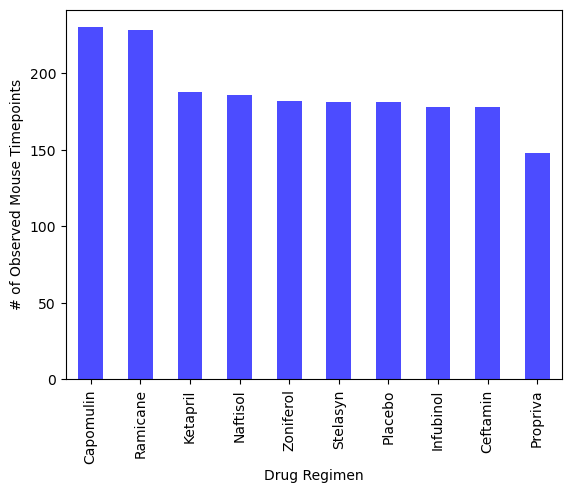

In [53]:
#BAR AND PIE CHARTS

#generate bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

mice_count = clean_mice_data_df["Drug Regimen"].value_counts()

mice_plot_pandas = mice_count.plot.bar(color="blue", alpha=0.7)

#set labels a

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

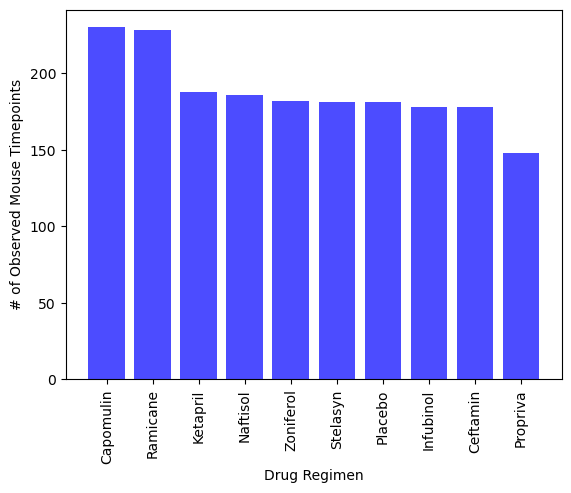

In [56]:
#generate bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen pyplot

drugs = mice_count.index.values
mice_tested = mice_count.values

plt.bar(drugs, mice_tested, color= "blue", alpha=0.7, align="center")


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

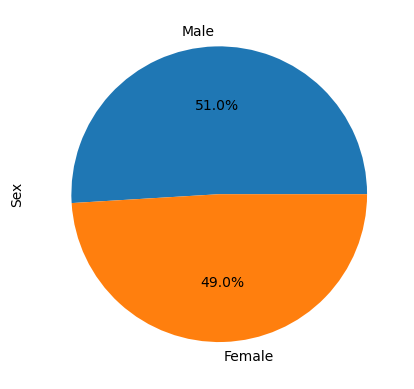

In [57]:
#generate pie plot showing distribution of female vs male mice using pandas

female_vs_male_data = clean_mice_data_df["Sex"].value_counts()
female_vs_male_data.plot.pie(autopct= "%1.1f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

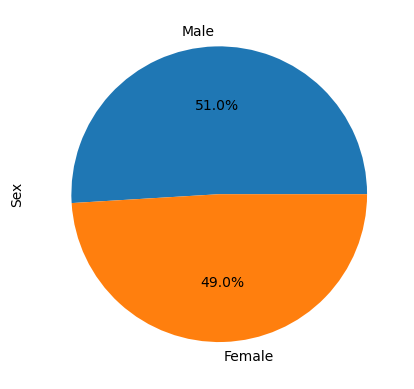

In [58]:
#generate a pie plot showing the distribution of female vs male mice using pyplot

labels = ["Male", "Female"]
sizes = [51.0, 49.0]
plot = female_vs_male_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show

In [59]:
#QUARTILES, OUTLIERS, AND BOXPLOTS

#calc the final tumor volume of each mouse across four of the treatment regimens:
#Capomulin, Ramicane, Infubinal, and Ceftamin

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = combined_data_df[combined_data_df["Drug Regimen"].isin(treatment_list)]
treatments.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [65]:


#Start by getting the last (greatest) timepoint for each mouse

tumor_volume_per_mouse = combined_data_df.groupby(["Mouse ID"]).max()
per_mouse_reset = tumor_volume_per_mouse.reset_index()



In [67]:
##merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Create empty list to fill with tumor vol data (for plotting)




merged_data = per_mouse_reset[["Mouse ID", "Timepoint"]].\
    merge(combined_data_df,on=["Mouse ID", "Timepoint"], how="left")



In [70]:



#outliers

def get_outliers(regimen):
    treatment_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = treatment_data.quantile([.25,.5,.75])
    quartile_first = quartiles[0.25]
    quartile_last = quartiles[0.75]
    quartile_range = quartile_last - quartile_first
    lower_bound = quartile_first - (1.5 * quartile_range)
    upper_bound = quartile_last + (1.5 * quartile_range)

    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return treatment_data
    
capo = get_outliers("Capomulin")
rami = get_outliers("Ramicane")
infu = get_outliers("Infubinol")
cefta = get_outliers("Ceftamin")









Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:


last_timepoint = treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
last_timepoint




In [74]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

treatment = 0
for treatment_drug in treatment_list:
    quartiles = last_timepoint[treatment_drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    if treatment == 0 :

        print(f"The lower quartile for {treatment_drug} treatments is: {lowerq}")
    print(f"The upper quartile for {treatment_drug} treatments is: {upperq}")
    print(f"The interquartile range for {treatment_drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {treatment_drug} outliers.")
    print(f"Values above {upper_bound} could be {treatment_drug} outliers.")

    treatment + 1
        










The lower quartile for Capomulin treatments is: 32.38
The upper quartile for Capomulin treatments is: 40.16
The interquartile range for Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
The lower quartile for Ramicane treatments is: 31.56
The upper quartile for Ramicane treatments is: 40.66
The interquartile range for Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
The lower quartile for Infubinol treatments is: 54.05
The upper quartile for Infubinol treatments is: 65.53
The interquartile range for Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
The lower quartile for Ceftamin treatments is: 48.72
The upper quartile for Ceftamin treatments is: 64.3
The interquartile range for Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values ab

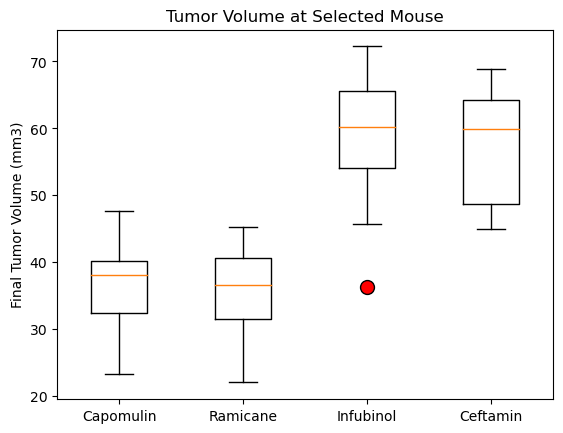

In [75]:
#generate a box plot that shows distrib. of the tumor volume for each treatment group

treatment_group_plot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([capo, rami, infu, cefta],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= treatment_group_plot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

In [82]:
#LINE AND SCATTER PLOTS

#generate a line plot of tumor vol vs. time point for a single mouse treated with Capomulin

capomulin_treatment_df = clean_mice_data_df.loc[clean_mice_data_df["Drug Regimen"] == "Capomulin",:]

capomulin_single_mouse_treatment_df = clean_mice_data_df.loc[clean_mice_data_df["Mouse ID"]== "b128",:]
capomulin_single_mouse_treatment_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


<function matplotlib.pyplot.show(close=None, block=None)>

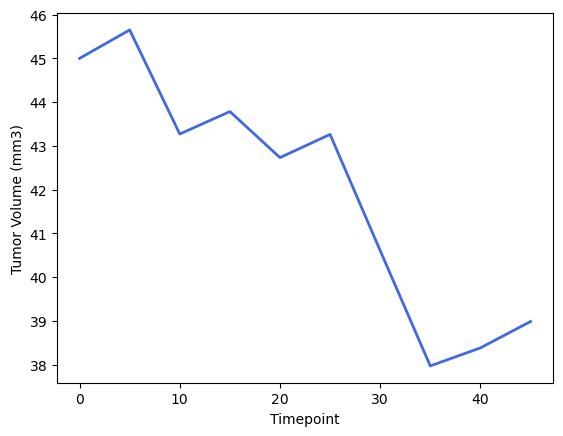

In [80]:
x_axis = capomulin_single_mouse_treatment_df["Timepoint"]
y_axis = capomulin_single_mouse_treatment_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, linewidth=2, color="royalblue")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

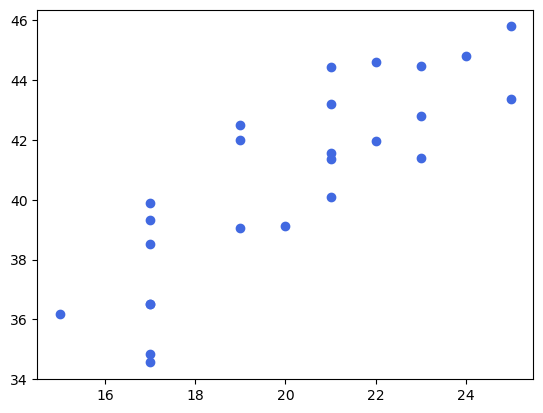

In [92]:
#generate scatter plot of mouse weight vs. the average observed tumor volume for the entire Capo regimen

Average_capo_tumor_vol = capomulin_treatment_df.groupby(["Mouse ID"]).mean()

marker_size = 13

plt.scatter(Average_capo_tumor_vol["Weight (g)"], Average_capo_tumor_vol["Tumor Volume (mm3)"], color = "royalblue")

plt.show

In [84]:
#CORRELATION AND REGRESSION

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(Average_capo_tumor_vol["Weight (g)"], Average_capo_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between weight and the average tumor vol is {round(correlation[0],2)}")


The correlation between weight and the average tumor vol is 0.84


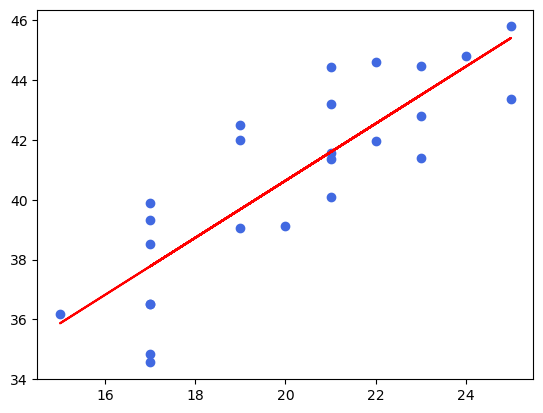

In [96]:
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(Average_capo_tumor_vol["Weight (g)"],Average_capo_tumor_vol["Tumor Volume (mm3)"])
linear_regression_values=Average_capo_tumor_vol["Weight (g)"]* slope + intercept


plt.scatter(Average_capo_tumor_vol["Weight (g)"],Average_capo_tumor_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(Average_capo_tumor_vol["Weight (g)"], linear_regression_values, color='red')



plt.show()